# Titanic dataset analysis
* About survived or not

In [57]:
import pandas as pd
import matplotlib.pyplot as plt 

In [58]:
titanic = pd.read_csv('titanic_dataset.csv')

### Column explanation
* pclass : Ticket class(1 == 1st, 2 == 2nd,,,)
* survived : 0 == No, 1 == yes
* name : Name
* sex : {'male', 'female'}
* age : Age
* sibsp : # of siblings / spouses aboard the Titanic
* parch : # of parents / chilren aboard the Titanic
* ticket : Ticket number
* cabin : Cabin number(객실번호)
* embarked : Port of Embarkation (C == Cherbourg, Q = Queenstown,,,)
* boat : boat # of survived passengers

In [59]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## survived and dead people ratio
생존 비율

In [60]:
titanic[titanic.survived == 1].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


In [61]:
titanic[titanic.survived == 0].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [62]:
survived = len(titanic[titanic.survived == 1])
dead = len(titanic[titanic.survived == 0])

whole = len(titanic)

print("survived people ratio : {0:.2f}%".format(survived/whole*100))
print("dead people ratio : {0:.2f}%".format(dead/whole*100))

survived people ratio : 38.20%
dead people ratio : 61.80%


In [63]:
df = pd.DataFrame([survived,dead], columns = ['survived_dead_count'], index =['survived', 'dead'])
df

,survived_dead_count
survived,500
dead,809


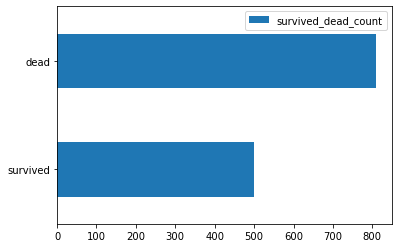

In [64]:
df = df.sort_values(by=['survived_dead_count'])
ax = df.plot.barh()

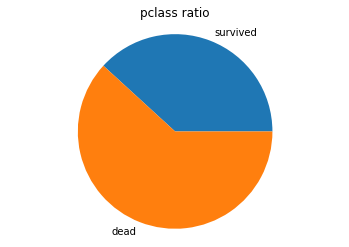

In [65]:
plt.pie(df.survived_dead_count, labels=['survived', 'dead'])
plt.axis('equal')
plt.title('pclass ratio')
plt.show()

### comment
* 생존한 사람이 더 적다.

## numbers of survived and dead by passenger classes(pclass)
티켓 클래스 별 생존 여부


* survived people by passenger classes</br>
티켓 클래스 별 생존자

In [71]:
titanic[titanic['survived'] == 1]['pclass'].value_counts().sort_index()

1    200
2    119
3    181
Name: pclass, dtype: int64

* dead people by passenger classes    
티켓 클래스 별 사망자

In [72]:
titanic[titanic['survived'] == 0].pclass.value_counts().sort_index()

1    123
2    158
3    528
Name: pclass, dtype: int64

            1    2    3
dead      123  158  528
survived  200  119  181


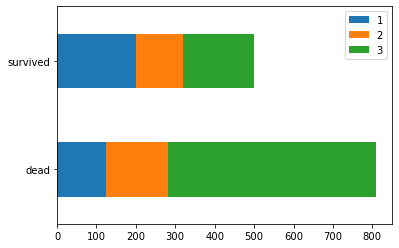

In [76]:
survived_pclass = titanic[titanic.survived == 1].pclass.value_counts().sort_index()
dead_pclass = titanic[titanic.survived == 0].pclass.value_counts().sort_index()

df = pd.DataFrame([survived_pclass, dead_pclass], index = ['survived', 'dead']).sort_index()
ax = df.plot.barh(stacked=True)
print(df)

### comment
* 생존자 중 1등석 인원이 가장 많은 수를 차지했다
* 사망자 중 3등석 인원이 가장 많은 수를 차지했다

* 1등석 인원의 생존률

In [83]:
survived_1 = len(titanic[(titanic.survived == 1)&(titanic.pclass == 1)])
dead_1 = len(titanic[(titanic.survived == 0)&(titanic.pclass == 1)])

whole_1 = len(titanic[titanic.pclass == 1])

print("survived ratio of 1st class : {0:.2f}%".format(survived_1/whole_1*100))

survived ratio of 1st class : 61.92%


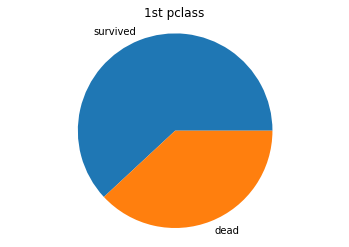

In [98]:
df = pd.DataFrame([survived_1, dead_1], columns=['pclass_1st'], index = ['survived', 'dead'])

plt.pie(df.pclass_1st, labels=['survived', 'dead'])
plt.axis('equal')
plt.title('1st pclass')
plt.show()

### comment
* 1등석은 생존자가 사망자보다 많다.
* 1등석의 생존률은 61.92% 이다

* 2등석 인원의 생존률

In [100]:
survived_2 = len(titanic[(titanic.survived == 1)&(titanic.pclass == 2)])
dead_2 = len(titanic[(titanic.survived == 0)&(titanic.pclass == 2)])

whole_2 = len(titanic[titanic.pclass == 2])

print("survived ratio of 1st class : {0:.2f}%".format(survived_2/whole_2*100))

survived ratio of 1st class : 42.96%


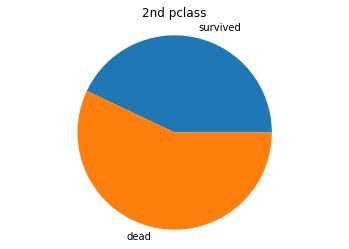

In [101]:
df = pd.DataFrame([survived_2, dead_2], columns=['pclass_2nd'], index = ['survived', 'dead'])

plt.pie(df.pclass_2nd, labels=['survived', 'dead'])
plt.axis('equal')
plt.title('2nd pclass')
plt.show()

### comment
* 2등석은 사망자가 생존자보다 많다.
* 2등석의 생존률은 42.96% 이다

* 3등석 인원의 생존률

In [104]:
survived_3 = len(titanic[(titanic.survived == 1)&(titanic.pclass == 3)])
dead_3 = len(titanic[(titanic.survived == 0)&(titanic.pclass == 3)])

whole_3 = len(titanic[titanic.pclass == 3])

print("survived ratio of 1st class : {0:.2f}%".format(survived_3/whole_3*100))

survived ratio of 1st class : 25.53%


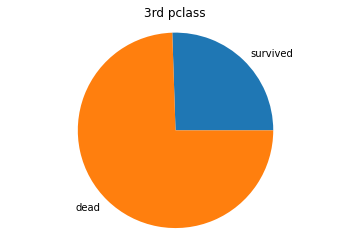

In [105]:
df = pd.DataFrame([survived_3, dead_3], columns=['pclass_3rd'], index = ['survived', 'dead'])

plt.pie(df.pclass_3rd, labels=['survived', 'dead'])
plt.axis('equal')
plt.title('3rd pclass')
plt.show()

### comment
* 3등석은 사망자가 생존자보다 월등히 많다.
* 3등석의 생존률은 25.53% 이다

## numbers of survived and dead by age
나이별 생존 여부   

> 나이 구간
* 0 : 0 <= age < 10
* 10 : 10 <= age < 20
* 20 : 20 <= age < 30
* 30 : 30 <= age < 40
* 40 : 40 <= age < 50
* 50 : 50 <= age < 60
* 60 : 60 <= age < 70
* 70 : 70 <= age < 80
* 80 : 80 <= age

make age intervals 

In [123]:
titanic['age_intervals'] = titanic.age.apply(lambda x: x//10*10)
#age 가 80 이상일 때, 80으로 고정
#lambda 는 if 문을 사용할 때는 else 가 필수!!
titanic['age_intervals'] = titanic.age_intervals.apply(lambda x: 80 if x >= 80 else x)
print(titanic.age_intervals)

0       20.0
1        0.0
2        0.0
3       30.0
4       20.0
        ... 
1304    10.0
1305     NaN
1306    20.0
1307    20.0
1308    20.0
Name: age_intervals, Length: 1309, dtype: float64


<AxesSubplot:>

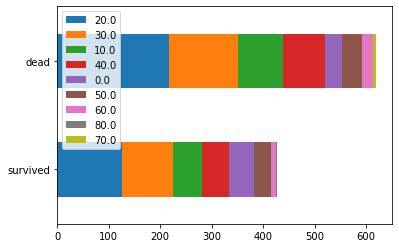

In [134]:
survived_age = titanic[titanic.survived == 1].age_intervals.value_counts()
dead_age = titanic[titanic.survived == 0].age_intervals.value_counts()

df = pd.DataFrame([survived_age, dead_age], index = ['survived', 'dead'])
df.plot.barh(stacked =True)

#### comment
* 사망자는 20, 30대가 가장 많다.
* 영유아와 노인들이 상대적으로 사망자가 낮다.